# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
Mouse_metadata_path = "data/Mouse_metadata.csv"
Study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
Mouse_metadata = pd.read_csv(Mouse_metadata_path)
Study_results = pd.read_csv(Study_results_path)

# Combine the data into a single DataFrame
MMM = pd.merge(Study_results, Mouse_metadata, how = "left", on = 'Mouse ID')

# Write it to a new CSV file
MMM.to_csv('MMM.csv')

# Display the data table for preview
MMM.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = MMM["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = MMM[MMM.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
MMM.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MMM_nodups = MMM.loc[MMM["Mouse ID"] != "g989"]
MMM_nodups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
MMM_nodups_mouse_count = MMM_nodups["Mouse ID"].nunique()
MMM_nodups_mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
MMM_nodups_mean = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
MMM_nodups_median = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
MMM_nodups_var = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
MMM_nodups_std = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
MMM_nodups_sem = MMM_nodups.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
MMM_summary_df = pd.DataFrame({"Mean Tumor Volume": MMM_nodups_mean,
                                "Median Tumor Volume": MMM_nodups_median,
                               "Tumor Volume Variance": MMM_nodups_var,
                              "Tumor Volume Std. Dev.": MMM_nodups_std,
                              "Tumor Volume Std. Err.": MMM_nodups_sem})
MMM_summary_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
MMM_summary_agg = MMM_nodups.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
MMM_summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

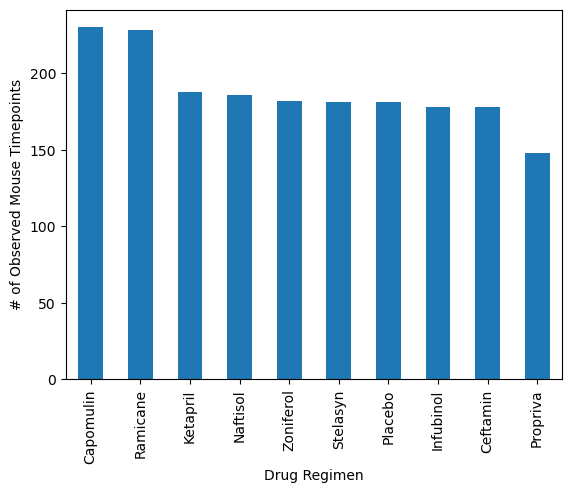

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
MMM_bar = MMM_nodups["Drug Regimen"].value_counts()
MMM_bar.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

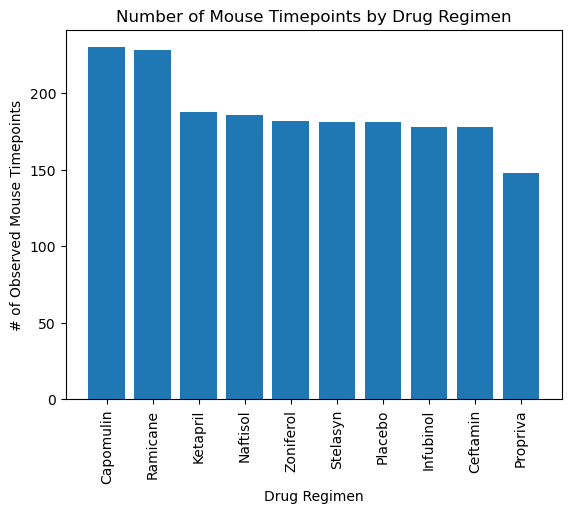

In [11]:
MMM_bar_py = MMM_nodups['Drug Regimen'].value_counts()
plt.bar(MMM_bar_py.index, MMM_bar_py.values)
plt.xticks(rotation="vertical")  # Rotate the x-axis labels for better readability
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Mouse Timepoints by Drug Regimen')
plt.show()

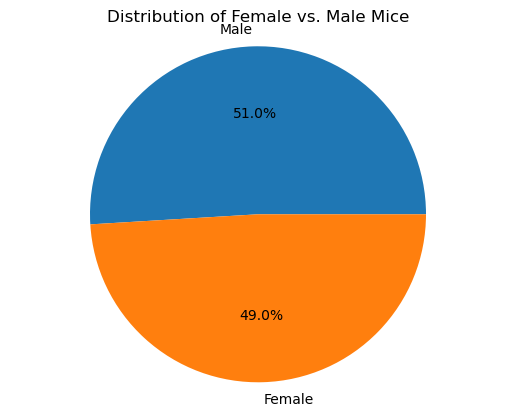

In [12]:
f_vs_m = MMM_nodups['Sex'].value_counts()
f_vs_m.plot(kind="pie", autopct='%1.1f%%')
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')  # Remove the y-axis label
plt.axis("equal")  # Ensure the pie chart is a perfect circle
plt.show()


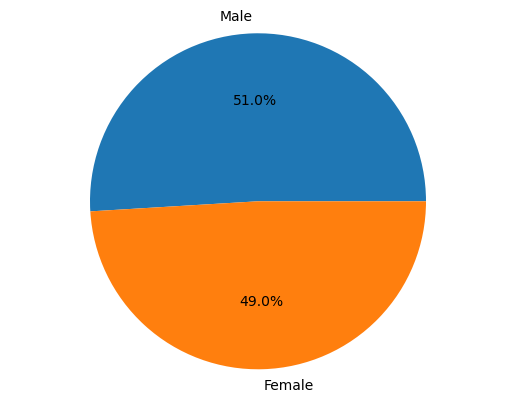

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(f_vs_m, labels=["Male", "Female"], autopct='%1.1f%%')
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume = MMM_nodups.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_Tumor_Volume_merged = pd.merge(MMM_nodups, tumor_volume, on=["Drug Regimen", "Mouse ID", "Timepoint"])

# Rename the column containing the final tumor volume
Final_Tumor_Volume_merged.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume (mm3) at Last Timepoint'}, inplace=True)

# Display the resulting DataFrame
Final_Tumor_Volume_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.0,0,Ketapril,Male,15,29
1,x336,0,45.0,0,Naftisol,Female,4,29
2,h428,0,45.0,0,Ketapril,Female,1,27
3,v199,0,45.0,0,Naftisol,Female,17,29
4,o848,0,45.0,0,Stelasyn,Female,14,27


In [17]:
# Create a list of the specified drug regimens
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store potential outliers
potential_outliers = []

# Loop through each drug regimen and calculate IQR and potential outliers
for drug in drug_regimens:
    # Select tumor volume data for the current drug regimen
    tumor_volume_data = Final_Tumor_Volume_merged[Final_Tumor_Volume_merged['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Calculate quartiles and IQR for the current drug regimen
    quartiles = tumor_volume_data.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Calculate lower and upper bounds to identify potential outliers
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    # Identify potential outliers for the current drug regimen
    outliers = tumor_volume_data[(tumor_volume_data < lower_bound) | (tumor_volume_data > upper_bound)]
    
    # Append potential outliers to the list
    potential_outliers.append({'Drug Regimen': drug, 'Potential Outliers': outliers})

# Display potential outliers for each drug regimen
for outlier_info in potential_outliers:
    drug = outlier_info['Drug Regimen']
    outliers = outlier_info['Potential Outliers']
    if not outliers.empty:
        print(f"{drug}'s potential outliers: {outliers}")


Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64


C:\Users\yvedu\AppData\Local\Temp\ipykernel_36220\1554390946.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_regimens)


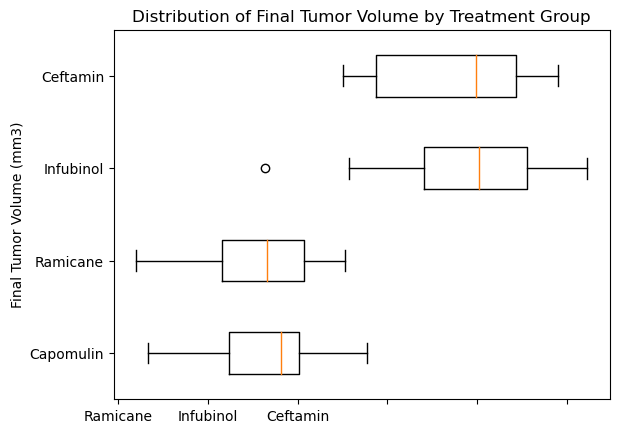

In [19]:
# Extract final tumor volume data for each treatment group
data_to_plot = [Final_Tumor_Volume_merged[Final_Tumor_Volume_merged['Drug Regimen'] == drug]['Tumor Volume (mm3)'].dropna() for drug in drug_regimens]

# Create a box plot
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(drug_regimens)
ax1.set_title('Distribution of Final Tumor Volume by Treatment Group')
ax1.boxplot(data_to_plot, labels=drug_regimens, vert=False)
plt.show()


## Line and Scatter Plots

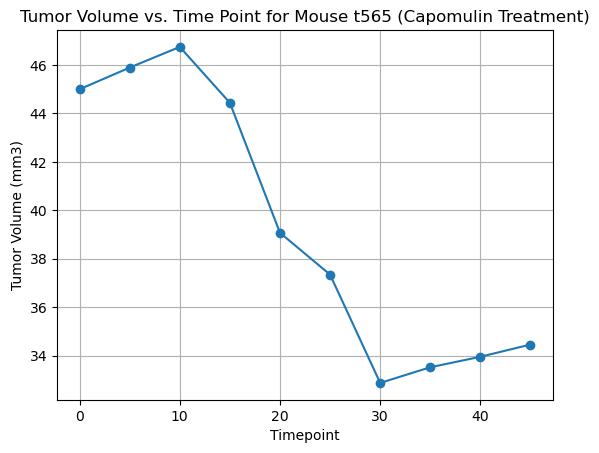

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Set x axis to Tumor Volume (mm3)_y
mouse_id = 't565'
capomulin_mouse_data = MMM_nodups[(MMM_nodups['Drug Regimen'] == 'Capomulin') & (MMM_nodups['Mouse ID'] == mouse_id)]

# Create a line plot of tumor volume vs. time point
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')
plt.grid(True)
plt.show()

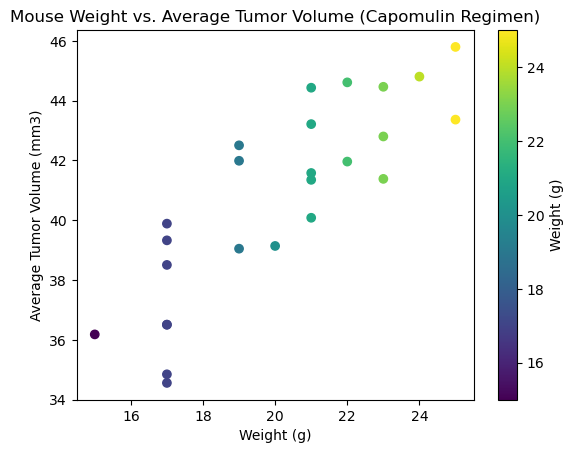

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = MMM_nodups[MMM_nodups['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Group the data by mouse ID and weight to avoid duplicate weight values
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.scatter(mouse_weight, average_tumor_volume, c=mouse_weight, cmap='viridis')
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.colorbar(label='Weight (g)')
plt.show()


## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress

# Filter the data for the Capomulin regimen
capomulin_data = MMM_nodups[MMM_nodups['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Group the data by mouse ID and weight to avoid duplicate weight values
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weight, average_tumor_volume)
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

# Create a linear regression model
slope, intercept, _, _, _ = linregress(mouse_weight, average_tumor_volume)
print(f'Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}')


Correlation Coefficient: 0.84
Linear Regression Model: y = 0.95x + 21.55
